###Đặng Quang Hưng ITDSIU18035

###PART 1

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/My Drive')
!pwd

/content/gdrive/My Drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mid-term.dataset.csv')
df

,X1,X2
0,12.69,1.86
1,12.85,1.80
2,13.20,1.83
3,13.61,1.80
4,13.51,1.74
5,13.75,1.83
6,13.38,1.80
7,13.55,1.80
8,13.63,1.83
9,13.25,1.77


In [ ]:
df.describe()

,X1,X2
count,10.000000,10.000000
mean,13.342000,1.806000
std,0.348004,0.034059
min,12.690000,1.740000
25%,13.212500,1.800000
50%,13.445000,1.800000
75%,13.595000,1.830000
max,13.750000,1.860000


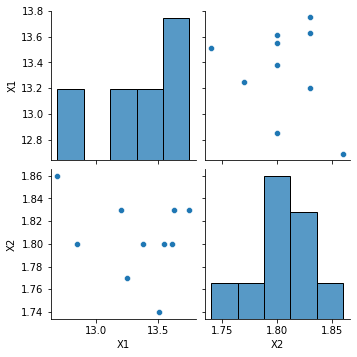

In [ ]:
sns.pairplot(df)

In [ ]:
# Covariance before PCA
covMatrix = np.cov(df['X1'], df['X2'], bias = True)
covMatrix

array([[ 0.108996, -0.002982],
       [-0.002982,  0.001044]])

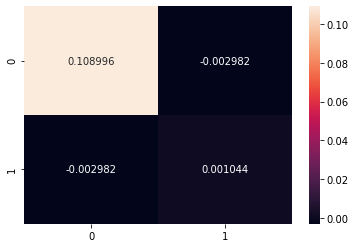

In [ ]:
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [ ]:
# Correlation before PCA
df.corr()

,X1,X2
X1,1.000000,-0.279545
X2,-0.279545,1.000000


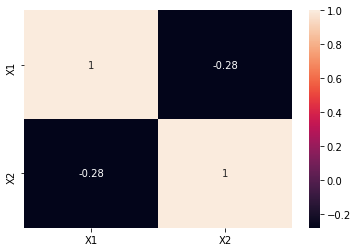

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
w, v = LA.eig(covMatrix)

In [ ]:
#elegenvalues
print(w)

[0.10907831 0.00096169]


In [ ]:
# elegenvector
print(v)

[[ 0.99961927  0.02759183]
 [-0.02759183  0.99961927]]


In [ ]:
# data after standardizing
substract_mean_data = df - df.mean()
substract_mean_data

,X1,X2
0,-0.652,0.054
1,-0.492,-0.006
2,-0.142,0.024
3,0.268,-0.006
4,0.168,-0.066
5,0.408,0.024
6,0.038,-0.006
7,0.208,-0.006
8,0.288,0.024
9,-0.092,-0.036


In [ ]:
# new data after PCA
np.dot(substract_mean_data, v)

array([[-6.53241725e-01,  3.59895655e-02],
       [-4.91647131e-01, -1.95728976e-02],
       [-1.42608141e-01,  2.00728222e-02],
       [ 2.68063516e-01,  1.39689567e-03],
       [ 1.69757099e-01, -6.13394440e-02],
       [ 4.07182459e-01,  3.52483305e-02],
       [ 3.81510834e-02, -4.94922597e-03],
       [ 2.08086360e-01, -2.58614322e-04],
       [ 2.87228147e-01,  3.19373105e-02],
       [-9.09716671e-02, -3.85247425e-02]])

In [ ]:
# correlation after PCA
newdata = pd.DataFrame(np.dot(substract_mean_data, v.T), columns=['X1_new', 'X2_new'])
newdata

,X1_new,X2_new
0,-0.650262,0.071969
1,-0.491978,0.007577
2,-0.141284,0.027909
3,0.267732,-0.013392
4,0.166115,-0.070610
5,0.408507,0.012733
6,0.037820,-0.007046
7,0.207755,-0.011737
8,0.288553,0.016044
9,-0.092958,-0.033448


In [ ]:
# Correlation after PCA
newdata.corr()

,X1_new,X2_new
X1_new,1.000000,-0.502636
X2_new,-0.502636,1.000000


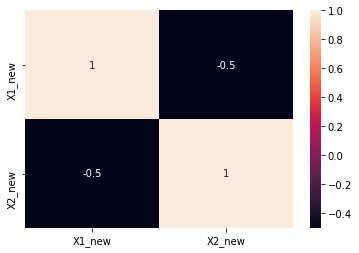

In [ ]:
sns.heatmap(newdata.corr(), annot=True)
plt.show()

In [ ]:
# Covariance after PCA
np.cov(newdata['X1_new'], newdata['X2_new'], bias = True)

array([[ 0.10874932, -0.00595492],
       [-0.00595492,  0.00129068]])

After PCAm, we can not find any improve in the relationship between these data
=> perhaps the data is not big enough!

###PART 2

In [ ]:
df2 = pd.read_csv('pop_failures.dat', delim_whitespace=True)
df2

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,0.400102,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,0.263398,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,0.870987,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,0.267685,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


In [ ]:
df2 = df2.iloc[:, 2:20]
df2

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,0.400102,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706
536,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,0.263398,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565
537,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,0.870987,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817
538,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,0.267685,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535


In [ ]:
# CORRELATION MATRIX BEFORE PCA
df2.corr()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
vconst_corr,1.000000,0.004039,0.009331,-0.018294,0.018880,0.001544,0.003714,-0.012735,0.002336,0.010617,-0.014205,-0.008992,-0.002980,-0.002133,-0.002099,0.015973,-0.016631,-0.001467
vconst_2,0.004039,1.000000,-0.000456,-0.000614,-0.008292,-0.024379,-0.005182,0.004179,-0.013860,-0.011072,0.019706,0.001623,0.002608,-0.014716,0.004386,0.005999,0.004202,0.009141
vconst_3,0.009331,-0.000456,1.000000,0.009899,0.006289,-0.001587,0.019941,0.004402,-0.007695,0.007100,-0.009428,-0.024702,-0.020637,-0.004264,-0.005210,-0.000559,0.004771,-0.001334
vconst_4,-0.018294,-0.000614,0.009899,1.000000,0.020504,0.021931,0.001805,-0.002334,-0.001731,-0.004753,0.018320,-0.010004,-0.006762,0.020442,-0.001080,-0.009262,-0.017147,0.005053
vconst_5,0.018880,-0.008292,0.006289,0.020504,1.000000,0.005887,-0.003047,0.012453,0.003634,0.001077,0.021354,-0.016312,0.021380,0.009894,-0.019179,-0.020752,-0.009324,0.012265
vconst_7,0.001544,-0.024379,-0.001587,0.021931,0.005887,1.000000,-0.016770,-0.021644,0.001244,0.015121,0.000075,0.015288,0.007036,-0.003641,-0.007897,-0.006576,0.013203,0.008412
ah_corr,0.003714,-0.005182,0.019941,0.001805,-0.003047,-0.016770,1.000000,-0.035498,-0.005119,0.009604,-0.006832,0.016503,0.002921,0.012447,-0.003368,0.007051,0.002443,-0.002381
ah_bolus,-0.012735,0.004179,0.004402,-0.002334,0.012453,-0.021644,-0.035498,1.000000,-0.009403,0.012260,0.012005,-0.003947,-0.019307,-0.010642,0.004866,0.032398,0.000259,0.007055
slm_corr,0.002336,-0.013860,-0.007695,-0.001731,0.003634,0.001244,-0.005119,-0.009403,1.000000,0.008760,0.002575,0.002272,0.002633,-0.003043,0.006023,-0.008447,-0.002301,0.014281
efficiency_factor,0.010617,-0.011072,0.007100,-0.004753,0.001077,0.015121,0.009604,0.012260,0.008760,1.000000,-0.017926,0.018009,0.011925,-0.034026,0.003393,0.009925,-0.005241,-0.004465


In [ ]:
# COVARIANCE MATRIX BEFORE PCA
covMatrix_climate = df2.cov()
covMatrix_climate

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
vconst_corr,0.083486,0.000337,0.000779,-0.001528,0.001576,0.000129,0.000310,-0.001063,0.000195,0.000886,-0.001187,-0.000751,-0.000249,-0.000178,-0.000175,0.001333,-0.001388,-0.000122
vconst_2,0.000337,0.083476,-0.000038,-0.000051,-0.000692,-0.002035,-0.000433,0.000349,-0.001157,-0.000924,0.001646,0.000136,0.000218,-0.001229,0.000366,0.000501,0.000351,0.000763
vconst_3,0.000779,-0.000038,0.083560,0.000827,0.000525,-0.000132,0.001666,0.000368,-0.000643,0.000593,-0.000788,-0.002064,-0.001723,-0.000356,-0.000435,-0.000047,0.000399,-0.000111
vconst_4,-0.001528,-0.000051,0.000827,0.083517,0.001711,0.001831,0.000151,-0.000195,-0.000145,-0.000397,0.001531,-0.000836,-0.000564,0.001707,-0.000090,-0.000773,-0.001432,0.000422
vconst_5,0.001576,-0.000692,0.000525,0.001711,0.083421,0.000491,-0.000254,0.001039,0.000303,0.000090,0.001783,-0.001362,0.001783,0.000826,-0.001600,-0.001731,-0.000778,0.001024
vconst_7,0.000129,-0.002035,-0.000132,0.001831,0.000491,0.083436,-0.001400,-0.001806,0.000104,0.001262,0.000006,0.001276,0.000587,-0.000304,-0.000659,-0.000549,0.001102,0.000702
ah_corr,0.000310,-0.000433,0.001666,0.000151,-0.000254,-0.001400,0.083527,-0.002964,-0.000427,0.000802,-0.000571,0.001378,0.000244,0.001039,-0.000281,0.000589,0.000204,-0.000199
ah_bolus,-0.001063,0.000349,0.000368,-0.000195,0.001039,-0.001806,-0.002964,0.083469,-0.000785,0.001024,0.001003,-0.000330,-0.001611,-0.000888,0.000406,0.002703,0.000022,0.000589
slm_corr,0.000195,-0.001157,-0.000643,-0.000145,0.000303,0.000104,-0.000427,-0.000785,0.083440,0.000731,0.000215,0.000190,0.000220,-0.000254,0.000503,-0.000705,-0.000192,0.001192
efficiency_factor,0.000886,-0.000924,0.000593,-0.000397,0.000090,0.001262,0.000802,0.001024,0.000731,0.083501,-0.001498,0.001504,0.000995,-0.002841,0.000283,0.000828,-0.000438,-0.000373


In [ ]:
  #Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = LA.eigh(covMatrix_climate)

In [ ]:
#elegenvalues
print(eigen_values)

[0.07697012 0.07727164 0.07820514 0.07893949 0.07970403 0.0810872
 0.0816109  0.08332811 0.08382111 0.08449341 0.08468789 0.08505451
 0.08537507 0.08657826 0.08748292 0.08819722 0.08984972 0.09010916]


In [ ]:
# elegenvector
print(eigen_vectors)

[[-1.42492976e-01 -4.20526304e-01  9.61757372e-02 -7.03147177e-02
  -7.69913514e-03  2.20400909e-02 -5.71123947e-02  5.53031727e-01
  -2.60918704e-01 -1.78241038e-01 -1.82395315e-01  1.58491641e-01
  -2.55769227e-01  2.00143721e-01 -3.60310933e-01  2.28728929e-01
   1.80957021e-01  2.02647015e-02]
 [-1.59647045e-01  2.18683799e-01 -1.09408985e-02  3.35529079e-01
  -2.19419953e-01 -2.78099602e-01  2.36815868e-01  3.06617763e-01
   2.20022696e-01 -2.59444563e-01  3.24335892e-01 -1.34769897e-01
  -1.86199080e-01  3.89230038e-01  7.53706969e-02 -1.53478459e-01
  -1.86863396e-01  2.21376253e-01]
 [ 1.45802852e-01  3.57357697e-04 -8.85505216e-02 -2.34815798e-01
  -5.48919233e-01  1.85243866e-01  1.01212864e-01 -9.16862256e-02
   1.25719045e-01  7.50005564e-02  1.57670857e-01 -4.49494403e-01
  -5.75145384e-02 -7.30327174e-02 -3.39590440e-01  4.25602429e-01
  -7.47453244e-02  4.96022969e-02]
 [ 4.23895796e-02 -3.02742682e-01  3.29390022e-01 -1.22969021e-01
   1.21117837e-01 -4.93596345e-01  1.

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
n_components = 5 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
# data after standardizing
substract_mean_data2 = (df2 - df2.mean())/df2.std()
substract_mean_data2

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl
0,1.242511,1.480426,-0.855033,-0.696490,-1.140754,0.817106,-0.248204,0.234923,-0.088881,-0.880506,-1.368805,1.276961,1.722811,-0.177622,-0.666003,1.240476,1.027831,1.279776
1,0.366910,-0.146642,-0.486320,-0.668396,1.188704,1.505744,-0.191988,1.135094,-0.704239,0.404058,1.645649,1.433538,1.195595,1.260460,-0.530358,-0.496760,-0.213101,0.042334
2,1.722071,-0.439073,0.060097,0.016863,0.411673,0.365784,0.851759,-1.052742,1.092652,0.620295,1.049466,0.498120,0.756549,1.470266,-0.638835,-0.863540,-0.741978,-0.464211
3,0.980766,-1.370754,-1.046452,-0.270878,0.838061,-0.031453,-1.711132,-0.373654,-1.696426,-0.099141,0.338587,0.905241,-0.474974,1.428889,1.654508,1.197579,0.690157,-0.083160
4,-0.324556,0.045351,-1.515967,0.469622,1.193783,-0.202217,-1.066167,-0.043368,-0.489893,0.177987,0.843548,-0.649390,0.520354,0.077236,-1.579661,-0.427211,-0.761144,-1.272393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.543747,-0.037109,-1.267231,-0.305092,-1.427229,-0.497225,-0.068698,-1.628183,-0.345989,-0.759830,-0.400749,1.335289,0.929806,-0.140041,-0.572690,0.252610,0.381273,0.822401
536,1.439291,1.185868,0.065450,-1.416980,-0.564422,1.362852,1.656152,0.605008,-0.819242,1.031255,-0.506484,-1.575137,1.699895,-0.529216,0.043449,1.075106,0.322950,-1.236818
537,-0.074157,1.526668,0.931333,1.559404,-1.075368,-1.340372,0.849751,0.093527,1.284163,-1.062439,1.139910,-1.378918,0.169463,-0.408299,-1.042265,1.270938,-0.132860,0.528682
538,-1.703591,0.966319,1.271127,0.708325,1.673256,-0.275608,0.728535,-1.126059,-0.804400,0.903299,-0.218832,0.657754,1.125954,1.667123,-1.338601,-0.468281,-1.033275,0.126341


In [ ]:
#Transform the data 
X_reduced5 = np.dot(eigenvector_subset.transpose(),substract_mean_data2.transpose()).transpose()
X_reduced5

array([[ 1.11104756,  1.61859656, -0.63227432,  0.82858118, -0.15135295],
       [-1.30798261,  0.00592904, -1.3793042 , -0.3446027 ,  0.11450484],
       [-2.12399158,  0.86818171,  0.75178163, -0.08857251,  0.8681585 ],
       ...,
       [ 0.60788732, -1.68327089,  0.81444611, -0.00790504,  0.84123988],
       [-2.11208432, -0.04974682,  0.95561623, -0.07264547,  0.98962993],
       [ 0.56541446, -0.41691481,  1.15778128,  0.54961438, -1.49530196]])

In [ ]:
# Covariance after PCA using 5 component
pd.DataFrame(X_reduced5).cov()

,0,1,2,3,4
0,1.079777,-0.000158,0.000098,0.000098,-0.000033
1,-0.000158,1.075928,-0.000152,0.000065,-0.000001
2,0.000098,-0.000152,1.056091,0.000138,0.000041
3,0.000098,0.000065,0.000138,1.047877,-0.000060
4,-0.000033,-0.000001,0.000041,-0.000060,1.037162


In [ ]:
# Correlation after PCA using 5 component
pd.DataFrame(X_reduced5).corr()

,0,1,2,3,4
0,1.000000,-0.000146,0.000092,0.000092,-0.000031
1,-0.000146,1.000000,-0.000142,0.000061,-0.000001
2,0.000092,-0.000142,1.000000,0.000132,0.000040
3,0.000092,0.000061,0.000132,1.000000,-0.000058
4,-0.000031,-0.000001,0.000040,-0.000058,1.000000


In [ ]:
n_components = 10 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
#Transform the data 
X_reduced10 = np.dot(eigenvector_subset.transpose(),substract_mean_data2.transpose()).transpose()
X_reduced10

array([[ 1.11104756,  1.61859656, -0.63227432, ...,  1.43602251,
        -0.92263186,  0.87888514],
       [-1.30798261,  0.00592904, -1.3793042 , ...,  1.26368094,
        -0.26197564, -1.21350064],
       [-2.12399158,  0.86818171,  0.75178163, ..., -0.63465475,
        -0.79615529, -1.48316642],
       ...,
       [ 0.60788732, -1.68327089,  0.81444611, ...,  0.49278151,
        -1.26650352,  0.49025687],
       [-2.11208432, -0.04974682,  0.95561623, ...,  1.96825468,
        -0.67757178,  0.69867588],
       [ 0.56541446, -0.41691481,  1.15778128, ..., -0.19283307,
         0.64969782, -0.00918401]])

In [ ]:
# Covariance after PCA using 10 component
pd.DataFrame(X_reduced10).cov()

,0,1,2,3,4,5,6,7,8,9
0,1.079777,-0.000158,0.000098,0.000098,-0.000033,0.000268,-0.000002,-0.000004,-0.000124,-0.000069
1,-0.000158,1.075928,-0.000152,0.000065,-0.000001,-0.000039,-0.000113,0.000056,0.000100,-0.000182
2,0.000098,-0.000152,1.056091,0.000138,0.000041,0.000150,0.000149,-0.000071,-0.000080,-0.000110
3,0.000098,0.000065,0.000138,1.047877,-0.000060,-0.000070,-0.000217,-0.000045,0.000165,0.000176
4,-0.000033,-0.000001,0.000041,-0.000060,1.037162,-0.000156,0.000040,0.000043,-0.000056,0.000214
5,0.000268,-0.000039,0.000150,-0.000070,-0.000156,1.022590,0.000049,-0.000034,0.000039,0.000165
6,-0.000002,-0.000113,0.000149,-0.000217,0.000040,0.000049,1.018640,0.000308,-0.000051,-0.000219
7,-0.000004,0.000056,-0.000071,-0.000045,0.000043,-0.000034,0.000308,1.014648,0.000179,-0.000037
8,-0.000124,0.000100,-0.000080,0.000165,-0.000056,0.000039,-0.000051,0.000179,1.011883,0.000129
9,-0.000069,-0.000182,-0.000110,0.000176,0.000214,0.000165,-0.000219,-0.000037,0.000129,1.003880


In [ ]:
#  Correlation after PCA using 10 component
pd.DataFrame(X_reduced10).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.000146,0.000092,0.000092,-0.000031,0.000255,-0.000002,-0.000004,-0.000119,-0.000066
1,-0.000146,1.000000,-0.000142,0.000061,-0.000001,-0.000037,-0.000108,0.000054,0.000096,-0.000175
2,0.000092,-0.000142,1.000000,0.000132,0.000040,0.000145,0.000143,-0.000069,-0.000078,-0.000107
3,0.000092,0.000061,0.000132,1.000000,-0.000058,-0.000068,-0.000210,-0.000043,0.000161,0.000171
4,-0.000031,-0.000001,0.000040,-0.000058,1.000000,-0.000152,0.000039,0.000042,-0.000055,0.000210
5,0.000255,-0.000037,0.000145,-0.000068,-0.000152,1.000000,0.000048,-0.000033,0.000038,0.000163
6,-0.000002,-0.000108,0.000143,-0.000210,0.000039,0.000048,1.000000,0.000303,-0.000050,-0.000217
7,-0.000004,0.000054,-0.000069,-0.000043,0.000042,-0.000033,0.000303,1.000000,0.000177,-0.000036
8,-0.000119,0.000096,-0.000078,0.000161,-0.000055,0.000038,-0.000050,0.000177,1.000000,0.000128
9,-0.000066,-0.000175,-0.000107,0.000171,0.000210,0.000163,-0.000217,-0.000036,0.000128,1.000000


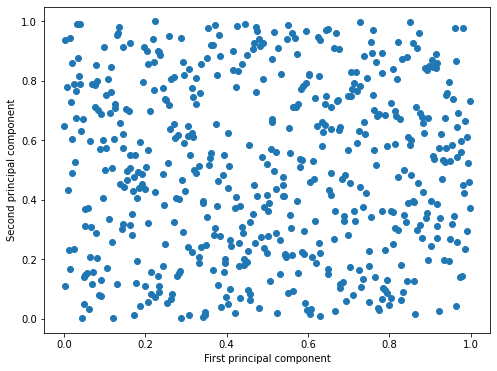

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

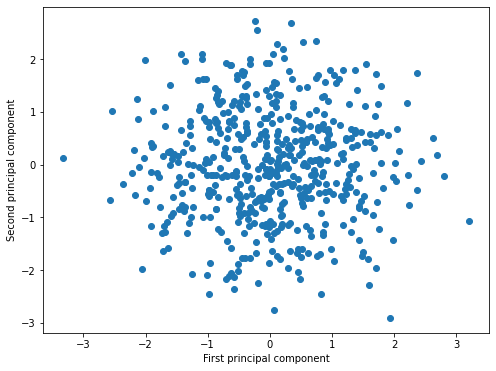

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pd.DataFrame(X_reduced10).iloc[:, 0], pd.DataFrame(X_reduced10).iloc[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)#df_in[col_name].quantile(0.25)
    q3 = np.percentile(df_in[col_name],75)#df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = [x for x in df_in[col_name] if x < fence_low or x > fence_high]
    outliers_removed = [x for x in df_in[col_name] if x > fence_low and x < fence_high]
    print('Identified outliers: %d' % len(outliers))
    print('Non-outlier observations: %d' % len(outliers_removed))
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
vconst_new = pd.DataFrame(X_reduced10, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10' ])
vconst_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.111048,1.618597,-0.632274,0.828581,-0.151353,-1.281408,1.992010,1.436023,-0.922632,0.878885
1,-1.307983,0.005929,-1.379304,-0.344603,0.114505,0.656795,1.289427,1.263681,-0.261976,-1.213501
2,-2.123992,0.868182,0.751782,-0.088573,0.868159,-0.088906,0.197660,-0.634655,-0.796155,-1.483166
3,0.547093,-0.536788,-0.145580,0.434045,-0.993230,0.433330,1.699604,-0.291635,0.233789,-1.736581
4,-1.456680,-0.836251,-1.062628,-0.621780,1.313303,0.740172,1.379669,0.117248,1.152366,-0.163732
...,...,...,...,...,...,...,...,...,...,...
535,0.032171,1.478587,-0.166923,1.959359,0.528776,-0.453313,1.119443,0.137195,-0.486434,0.815351
536,1.073348,1.546871,0.727535,-0.743201,1.012983,-1.014957,0.052469,1.648115,1.249224,-1.460087
537,0.607887,-1.683271,0.814446,-0.007905,0.841240,-0.355728,-0.733772,0.492782,-1.266504,0.490257
538,-2.112084,-0.049747,0.955616,-0.072645,0.989630,0.894285,-0.020758,1.968255,-0.677572,0.698676


In [ ]:
remove_outlier(vconst_new, 'X1')

Identified outliers: 2
Non-outlier observations: 538


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.111048,1.618597,-0.632274,0.828581,-0.151353,-1.281408,1.992010,1.436023,-0.922632,0.878885
1,-1.307983,0.005929,-1.379304,-0.344603,0.114505,0.656795,1.289427,1.263681,-0.261976,-1.213501
2,-2.123992,0.868182,0.751782,-0.088573,0.868159,-0.088906,0.197660,-0.634655,-0.796155,-1.483166
3,0.547093,-0.536788,-0.145580,0.434045,-0.993230,0.433330,1.699604,-0.291635,0.233789,-1.736581
4,-1.456680,-0.836251,-1.062628,-0.621780,1.313303,0.740172,1.379669,0.117248,1.152366,-0.163732
...,...,...,...,...,...,...,...,...,...,...
535,0.032171,1.478587,-0.166923,1.959359,0.528776,-0.453313,1.119443,0.137195,-0.486434,0.815351
536,1.073348,1.546871,0.727535,-0.743201,1.012983,-1.014957,0.052469,1.648115,1.249224,-1.460087
537,0.607887,-1.683271,0.814446,-0.007905,0.841240,-0.355728,-0.733772,0.492782,-1.266504,0.490257
538,-2.112084,-0.049747,0.955616,-0.072645,0.989630,0.894285,-0.020758,1.968255,-0.677572,0.698676


In [ ]:
remove_outlier(vconst_new, 'X2')

Identified outliers: 3
Non-outlier observations: 537


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.111048,1.618597,-0.632274,0.828581,-0.151353,-1.281408,1.992010,1.436023,-0.922632,0.878885
1,-1.307983,0.005929,-1.379304,-0.344603,0.114505,0.656795,1.289427,1.263681,-0.261976,-1.213501
2,-2.123992,0.868182,0.751782,-0.088573,0.868159,-0.088906,0.197660,-0.634655,-0.796155,-1.483166
3,0.547093,-0.536788,-0.145580,0.434045,-0.993230,0.433330,1.699604,-0.291635,0.233789,-1.736581
4,-1.456680,-0.836251,-1.062628,-0.621780,1.313303,0.740172,1.379669,0.117248,1.152366,-0.163732
...,...,...,...,...,...,...,...,...,...,...
535,0.032171,1.478587,-0.166923,1.959359,0.528776,-0.453313,1.119443,0.137195,-0.486434,0.815351
536,1.073348,1.546871,0.727535,-0.743201,1.012983,-1.014957,0.052469,1.648115,1.249224,-1.460087
537,0.607887,-1.683271,0.814446,-0.007905,0.841240,-0.355728,-0.733772,0.492782,-1.266504,0.490257
538,-2.112084,-0.049747,0.955616,-0.072645,0.989630,0.894285,-0.020758,1.968255,-0.677572,0.698676


In [ ]:
from scipy import stats

z_scores = stats.zscore(vconst_new)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
vconst_new = vconst_new[filtered_entries]
vconst_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.111048,1.618597,-0.632274,0.828581,-0.151353,-1.281408,1.992010,1.436023,-0.922632,0.878885
1,-1.307983,0.005929,-1.379304,-0.344603,0.114505,0.656795,1.289427,1.263681,-0.261976,-1.213501
2,-2.123992,0.868182,0.751782,-0.088573,0.868159,-0.088906,0.197660,-0.634655,-0.796155,-1.483166
3,0.547093,-0.536788,-0.145580,0.434045,-0.993230,0.433330,1.699604,-0.291635,0.233789,-1.736581
4,-1.456680,-0.836251,-1.062628,-0.621780,1.313303,0.740172,1.379669,0.117248,1.152366,-0.163732
...,...,...,...,...,...,...,...,...,...,...
535,0.032171,1.478587,-0.166923,1.959359,0.528776,-0.453313,1.119443,0.137195,-0.486434,0.815351
536,1.073348,1.546871,0.727535,-0.743201,1.012983,-1.014957,0.052469,1.648115,1.249224,-1.460087
537,0.607887,-1.683271,0.814446,-0.007905,0.841240,-0.355728,-0.733772,0.492782,-1.266504,0.490257
538,-2.112084,-0.049747,0.955616,-0.072645,0.989630,0.894285,-0.020758,1.968255,-0.677572,0.698676


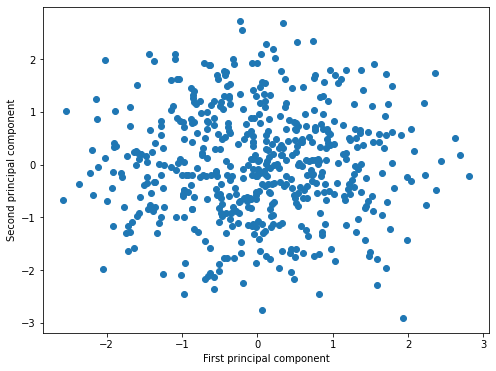

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(vconst_new['X1'], vconst_new['X2'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

###PART 3

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale data befor applying PCA
scaler = StandardScaler()
# Use fit and transform method 
scaler.fit(df2)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
Scaled_data = scaler.transform(df2)

In [ ]:
Scaled_data


array([[ 1.24366277,  1.48179886, -0.85582599, ...,  1.24162583,
         1.02878419,  1.28096213],
       [ 0.36725022, -0.14677799, -0.48677076, ..., -0.49722074,
        -0.21329849,  0.04237293],
       [ 1.72366738, -0.43948034,  0.06015254, ..., -0.86434108,
        -0.74266592, -0.46464188],
       ...,
       [-0.0742258 ,  1.52808349,  0.93219643, ...,  1.27211616,
        -0.13298309,  0.52917269],
       [-1.70517056,  0.96721474,  1.27230519, ..., -0.46871473,
        -1.03423341,  0.12645852],
       [ 0.3742947 , -1.6231891 ,  0.34015515, ..., -0.12376988,
         0.90180974,  0.90882234]])

In [ ]:
#set the PCA using 5 components
pca = PCA(n_components=5)

In [ ]:
pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca5 = pca.transform(Scaled_data)

In [ ]:
x_pca5

array([[ 0.31409612, -1.88963237, -0.91293732, -0.09803384,  0.5685233 ],
       [-1.13559228,  0.70791467, -1.52052336,  0.78675173, -0.17087605],
       [-2.25783031, -0.07725048,  0.44697197,  0.32251387, -0.94545836],
       ...,
       [ 1.3068138 ,  1.11291193,  1.21388571,  0.2337157 , -0.94108866],
       [-1.80197202,  0.93966919,  1.1804065 ,  0.09412573, -1.32474607],
       [ 0.60706709,  0.09759442,  1.39577233, -1.10065936,  1.41015533]])

In [ ]:
# covariance after PCA
pd.DataFrame(x_pca5).cov()

,0,1,2,3,4
0,1.078524,-0.000139,0.000039,0.000014,0.000170
1,-0.000139,1.074498,0.000230,-0.000083,-0.000112
2,0.000039,0.000230,1.054109,-0.000040,0.000004
3,0.000014,-0.000083,-0.000040,1.043907,0.000037
4,0.000170,-0.000112,0.000004,0.000037,1.037250


In [ ]:
# correlation after PCA
pd.DataFrame(x_pca5).corr()

,0,1,2,3,4
0,1.000000,-0.000130,0.000037,0.000013,0.000160
1,-0.000130,1.000000,0.000216,-0.000079,-0.000106
2,0.000037,0.000216,1.000000,-0.000038,0.000004
3,0.000013,-0.000079,-0.000038,1.000000,0.000036
4,0.000160,-0.000106,0.000004,0.000036,1.000000


In [ ]:
#set the PCA using 10 components
pca = PCA(n_components=10)

In [ ]:
pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca10 = pca.transform(Scaled_data)

In [ ]:
x_pca10

array([[-1.04103789, -1.6694667 , -0.61331988, ...,  1.21763998,
         0.97837768,  0.95745248],
       [ 1.31452677,  0.03679751, -1.37050321, ...,  1.14288815,
         0.34632621, -1.17852872],
       [ 2.15417561, -0.78125289,  0.77645792, ..., -0.70295175,
         0.77420758, -1.45555651],
       ...,
       [-0.68649909,  1.65565604,  0.79606349, ...,  0.4518231 ,
         1.30184713,  0.49186592],
       [ 2.10558606,  0.14903476,  0.96011664, ...,  1.91421491,
         0.80697198,  0.67226446],
       [-0.58900866,  0.39999528,  1.15625167, ..., -0.08174996,
        -0.66630146, -0.02410038]])

In [ ]:
# covariance after PCA
pd.DataFrame(x_pca10).cov()

,0,1,2,3,4,5,6,7,8,9
0,1.081790e+00,-2.409946e-16,-2.249283e-16,-4.169001e-16,5.757093e-17,-4.992914e-16,2.636522e-17,-2.966087e-16,6.113436e-16,6.723132e-16
1,-2.409946e-16,1.077922e+00,1.677487e-15,1.275418e-15,-1.334739e-16,-3.130870e-16,-3.097914e-16,-1.219392e-16,-4.805474e-16,2.158653e-16
2,-2.249283e-16,1.677487e-15,1.058055e+00,1.202913e-16,-3.336848e-17,8.181458e-16,4.778697e-16,-1.466565e-16,6.377088e-16,2.949609e-16
3,-4.169001e-16,1.275418e-15,1.202913e-16,1.049824e+00,-1.124847e-15,-7.207181e-16,8.289210e-16,-8.733480e-17,1.172428e-15,-9.442045e-16
4,5.757093e-17,-1.334739e-16,-3.336848e-17,-1.124847e-15,1.039092e+00,1.858748e-15,-1.400652e-17,9.392610e-17,4.778697e-17,-5.664403e-16
5,-4.992914e-16,-3.130870e-16,8.181458e-16,-7.207181e-16,1.858748e-15,1.024487e+00,1.194674e-16,3.724088e-16,-8.651089e-17,-6.327653e-16
6,2.636522e-17,-3.097914e-16,4.778697e-16,8.289210e-16,-1.400652e-17,1.194674e-16,1.020556e+00,7.019740e-16,-8.675806e-16,-6.084599e-16
7,-2.966087e-16,-1.219392e-16,-1.466565e-16,-8.733480e-17,9.392610e-17,3.724088e-16,7.019740e-16,1.016521e+00,2.817783e-16,1.433609e-16
8,6.113436e-16,-4.805474e-16,6.377088e-16,1.172428e-15,4.778697e-17,-8.651089e-17,-8.675806e-16,2.817783e-16,1.013751e+00,1.845566e-16
9,6.723132e-16,2.158653e-16,2.949609e-16,-9.442045e-16,-5.664403e-16,-6.327653e-16,-6.084599e-16,1.433609e-16,1.845566e-16,1.005738e+00


In [ ]:
# correlation after PCA
pd.DataFrame(x_pca10).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,-2.286572e-16,-2.210231e-16,-3.892702e-16,5.595197e-17,-4.787742e-16,3.469803e-17,-2.727207e-16,5.834835e-16,6.631047e-16
1,-2.286572e-16,1.000000e+00,1.572212e-15,1.195802e-15,-1.387683e-16,-2.918810e-16,-2.890795e-16,-1.315686e-16,-4.796039e-16,2.052856e-16
2,-2.210231e-16,1.572212e-15,1.000000e+00,1.377838e-16,-4.007472e-17,7.668280e-16,4.416357e-16,-1.665376e-16,6.167419e-16,2.863472e-16
3,-3.892702e-16,1.195802e-15,1.377838e-16,1.000000e+00,-1.081715e-15,-6.993700e-16,7.972785e-16,-9.811273e-17,1.118313e-15,-9.194328e-16
4,5.595197e-17,-1.387683e-16,-4.007472e-17,-1.081715e-15,1.000000e+00,1.820491e-15,-1.440153e-17,8.402517e-17,5.117632e-17,-5.541082e-16
5,-4.787742e-16,-2.918810e-16,7.668280e-16,-6.993700e-16,1.820491e-15,1.000000e+00,1.232825e-16,3.512166e-16,-7.513697e-17,-6.186364e-16
6,3.469803e-17,-2.890795e-16,4.416357e-16,7.972785e-16,-1.440153e-17,1.232825e-16,1.000000e+00,6.652598e-16,-8.546757e-16,-5.973083e-16
7,-2.727207e-16,-1.315686e-16,-1.665376e-16,-9.811273e-17,8.402517e-17,3.512166e-16,6.652598e-16,1.000000e+00,2.867714e-16,1.562590e-16
8,5.834835e-16,-4.796039e-16,6.167419e-16,1.118313e-15,5.117632e-17,-7.513697e-17,-8.546757e-16,2.867714e-16,1.000000e+00,1.706840e-16
9,6.631047e-16,2.052856e-16,2.863472e-16,-9.194328e-16,-5.541082e-16,-6.186364e-16,-5.973083e-16,1.562590e-16,1.706840e-16,1.000000e+00


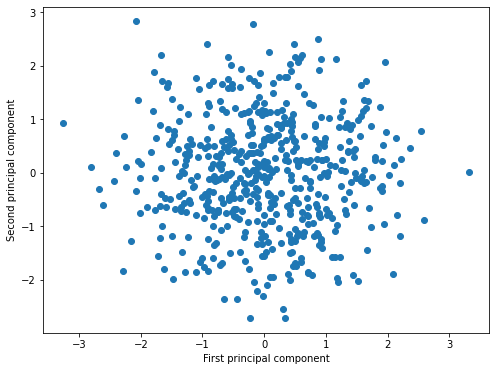

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pd.DataFrame(x_pca10).iloc[:, 0], pd.DataFrame(x_pca10).iloc[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [ ]:
x_pca10 = pd.DataFrame(x_pca10, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10' ])
x_pca10

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-1.041038,-1.669467,-0.613320,-0.823352,0.120946,1.259642,2.113843,1.217640,0.978378,0.957452
1,1.314527,0.036798,-1.370503,0.338547,-0.101130,-0.670657,1.397403,1.142888,0.346326,-1.178529
2,2.154176,-0.781253,0.776458,0.109134,-0.852996,0.083702,0.173432,-0.702952,0.774208,-1.455557
3,-0.572453,0.514516,-0.127384,-0.421125,1.002213,-0.433957,1.689186,-0.380001,-0.251991,-1.697861
4,1.426957,0.890555,-1.061555,0.614771,-1.302663,-0.782181,1.366398,0.086065,-1.150543,-0.178382
...,...,...,...,...,...,...,...,...,...,...
535,0.022179,-1.485248,-0.116526,-1.952550,-0.553130,0.420984,1.139843,0.019049,0.473714,0.849288
536,-1.005019,-1.594426,0.716939,0.766375,-1.005208,1.022206,0.192057,1.724836,-1.128820,-1.448649
537,-0.686499,1.655656,0.796063,0.016470,-0.845601,0.368611,-0.686430,0.451823,1.301847,0.491866
538,2.105586,0.149035,0.960117,0.090712,-0.995450,-0.901842,0.110566,1.914215,0.806972,0.672264


In [ ]:
remove_outlier(x_pca10, 'X1')

Identified outliers: 2
Non-outlier observations: 538


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-1.041038,-1.669467,-0.613320,-0.823352,0.120946,1.259642,2.113843,1.217640,0.978378,0.957452
1,1.314527,0.036798,-1.370503,0.338547,-0.101130,-0.670657,1.397403,1.142888,0.346326,-1.178529
2,2.154176,-0.781253,0.776458,0.109134,-0.852996,0.083702,0.173432,-0.702952,0.774208,-1.455557
3,-0.572453,0.514516,-0.127384,-0.421125,1.002213,-0.433957,1.689186,-0.380001,-0.251991,-1.697861
4,1.426957,0.890555,-1.061555,0.614771,-1.302663,-0.782181,1.366398,0.086065,-1.150543,-0.178382
...,...,...,...,...,...,...,...,...,...,...
535,0.022179,-1.485248,-0.116526,-1.952550,-0.553130,0.420984,1.139843,0.019049,0.473714,0.849288
536,-1.005019,-1.594426,0.716939,0.766375,-1.005208,1.022206,0.192057,1.724836,-1.128820,-1.448649
537,-0.686499,1.655656,0.796063,0.016470,-0.845601,0.368611,-0.686430,0.451823,1.301847,0.491866
538,2.105586,0.149035,0.960117,0.090712,-0.995450,-0.901842,0.110566,1.914215,0.806972,0.672264


In [ ]:
remove_outlier(x_pca10, 'X2')

Identified outliers: 2
Non-outlier observations: 538


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-1.041038,-1.669467,-0.613320,-0.823352,0.120946,1.259642,2.113843,1.217640,0.978378,0.957452
1,1.314527,0.036798,-1.370503,0.338547,-0.101130,-0.670657,1.397403,1.142888,0.346326,-1.178529
2,2.154176,-0.781253,0.776458,0.109134,-0.852996,0.083702,0.173432,-0.702952,0.774208,-1.455557
3,-0.572453,0.514516,-0.127384,-0.421125,1.002213,-0.433957,1.689186,-0.380001,-0.251991,-1.697861
4,1.426957,0.890555,-1.061555,0.614771,-1.302663,-0.782181,1.366398,0.086065,-1.150543,-0.178382
...,...,...,...,...,...,...,...,...,...,...
535,0.022179,-1.485248,-0.116526,-1.952550,-0.553130,0.420984,1.139843,0.019049,0.473714,0.849288
536,-1.005019,-1.594426,0.716939,0.766375,-1.005208,1.022206,0.192057,1.724836,-1.128820,-1.448649
537,-0.686499,1.655656,0.796063,0.016470,-0.845601,0.368611,-0.686430,0.451823,1.301847,0.491866
538,2.105586,0.149035,0.960117,0.090712,-0.995450,-0.901842,0.110566,1.914215,0.806972,0.672264


In [ ]:
from scipy import stats

z_scores = stats.zscore(x_pca10)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
x_pca10 = x_pca10[filtered_entries]
x_pca10

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-1.041038,-1.669467,-0.613320,-0.823352,0.120946,1.259642,2.113843,1.217640,0.978378,0.957452
1,1.314527,0.036798,-1.370503,0.338547,-0.101130,-0.670657,1.397403,1.142888,0.346326,-1.178529
2,2.154176,-0.781253,0.776458,0.109134,-0.852996,0.083702,0.173432,-0.702952,0.774208,-1.455557
3,-0.572453,0.514516,-0.127384,-0.421125,1.002213,-0.433957,1.689186,-0.380001,-0.251991,-1.697861
4,1.426957,0.890555,-1.061555,0.614771,-1.302663,-0.782181,1.366398,0.086065,-1.150543,-0.178382
...,...,...,...,...,...,...,...,...,...,...
535,0.022179,-1.485248,-0.116526,-1.952550,-0.553130,0.420984,1.139843,0.019049,0.473714,0.849288
536,-1.005019,-1.594426,0.716939,0.766375,-1.005208,1.022206,0.192057,1.724836,-1.128820,-1.448649
537,-0.686499,1.655656,0.796063,0.016470,-0.845601,0.368611,-0.686430,0.451823,1.301847,0.491866
538,2.105586,0.149035,0.960117,0.090712,-0.995450,-0.901842,0.110566,1.914215,0.806972,0.672264


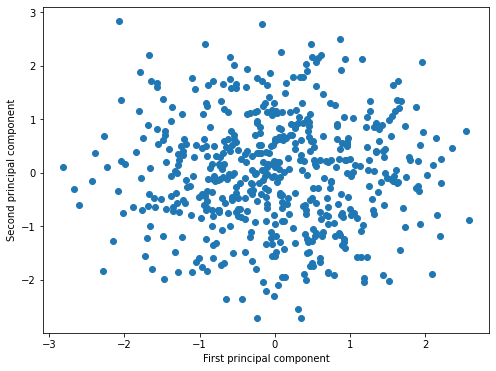

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca10['X1'], x_pca10['X2'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()